# Viral Tweets

In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Project from https://www.codecademy.com/paths/data-science/tracks/supervised-machine-learning-cumulative-project-skill-path/modules/supervised-learning-cumulative-project-skill-path/informationals/twitter-classification-cumulative-project-skill-path

In [1]:
# Importing library, loading data and taking a look at investigating the data

In [2]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

# Total number of tweets in dataset 
print(len(all_tweets))
# Columns/features of dataset
print(all_tweets.columns)
# Text of dataset's first tweet
print(all_tweets.loc[0]['text'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…


In [3]:
# Checking what the "user" feature looks like
print(all_tweets.loc[0]["user"])

# Checking what the "location" looks like in user dictionary for first tweet 
print(all_tweets.loc[0]["user"]["location"])

{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4475, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '022330', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/995790590276243456/cgxRVviN_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/995790590276243456/c

In [4]:
# Defining viral tweets

import numpy as np

# creating new column with viral tweets: 1 if retweet_count is higher than median, else 0
median_retweets = all_tweets['retweet_count'].median()
print(median_retweets)
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >= median_retweets, 1, 0)

# Counting number of tweets in each feature: viral or not
print(all_tweets['is_viral'].value_counts())

13.0
1    5591
0    5508
Name: is_viral, dtype: int64


In [5]:
# Creating features possibly determining whether a tweet is viral

# Feature_1: tweet_length
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)

# Feature_2: followers_count 
all_tweets['followers_count'] = [all_tweets.loc[i]['user']['followers_count'] for i in range(len(all_tweets))]

# Feature_3: friends_count 
all_tweets['friends_count'] = [all_tweets.loc[i]['user']['friends_count'] for i in range(len(all_tweets))]

# Feature_4: number of hashtags in tweet 
all_tweets['number_hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count("#"), axis=1)
# print(all_tweets['number_hashtags'].value_counts())

# Feature_5: number of links in tweet 
all_tweets['number_links'] = all_tweets.apply(lambda tweet: tweet['text'].count("http"), axis=1)
# print(all_tweets['number_links'].value_counts())

# Feature_6: number of words in tweet 
all_tweets['number_words_in_tweet'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1) 
# print(all_tweets['number_words_in_tweet'].value_counts())

# Feature_7: average length of words in tweet 
all_tweets['words_in_tweet'] = all_tweets.apply(lambda tweet: tweet['text'].split(), axis=1) 
all_tweets['avg_length_words_in_tweet'] = [sum(map(len, all_tweets['words_in_tweet'][i])) / len(all_tweets['words_in_tweet'][i]) for i in range(len(all_tweets['words_in_tweet']))]
# print(all_tweets['avg_length_words_in_tweet'].head())

In [6]:
# Normalizing the data 

# Gathering data and labels into variables
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count']]



# Scaling the data and more specifically the columns as oppposed to the rows, thanks to axis=0
# scaling so all features vary within the same range

from sklearn.preprocessing import scale

scaled_data = scale(data,axis=0)
print(scaled_data[0])


[ 0.6164054  -0.02878298 -0.14483305]


In [7]:
# Creating the Training Set and Test Set
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size=0.2, random_state=1)

In [8]:
# Classifying the data 
from sklearn.neighbors import KNeighborsClassifier
# Creating KNeighborsClassifier object 
classifier = KNeighborsClassifier(n_neighbors=5)

# Training classifier 
classifier.fit(train_data, train_labels)

# Testing the model
print(classifier.score(test_data, test_labels))


0.5905405405405405


In [9]:
# Choosing K by testing different values of k and graphing results

scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)
    
print(scores[0])


0.5684684684684684


In [10]:
# plotting the results

import matplotlib.pyplot as plt

plt.plot(range(1, 200), scores)
plt.title('Classifier Accuracy best on K value')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Exploring further the data: 
# testing if other features would provide a better accuracy

# Normalizing the data
labels = all_tweets['is_viral']
data = all_tweets[['number_hashtags', 'number_links', 'number_words_in_tweet', 'avg_length_words_in_tweet']]


In [12]:
# Scaling the data and more specifically the columns as oppposed to the rows, thanks to axis=0
# scaling so all features vary within the same range

from sklearn.preprocessing import scale

scaled_data_new = scale(data,axis=0)
print(scaled_data[0])


[ 0.6164054  -0.02878298 -0.14483305]


In [13]:
# Creating the training set and test set 
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data_new, labels, test_size=0.2, random_state=1)



In [14]:
# Using the classifier
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors=5)
classifier_2.fit(train_data, train_labels)
print(classifier_2.score(test_data, test_labels))

0.7211711711711711


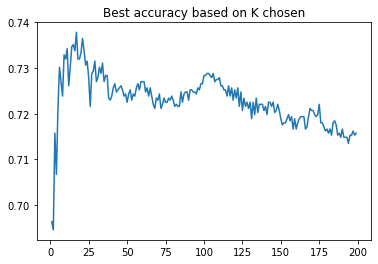

In [15]:
# Choosing K
scores_ = []
for k_2 in range(1, 200):
    classifier_2 = KNeighborsClassifier(k_2)
    classifier_2.fit(train_data, train_labels)
    score_ = classifier_2.score(test_data, test_labels)
    scores_.append(score_)
plt.plot(range(1, 200), scores_)
plt.title('Best accuracy based on K chosen')
plt.show()

Using the features: number of hashtags, number of links, number of words in tweet and average length of words in tweet, and with a K =5, the accuracy to predict whether a tweet will become viral is higher than using the three previous features: it is at 72% as opposed to 59% when building the model using the features tweet length, followers count, friends count. 

Increasing K would provide an even better accuracy, close to 74%. However, passed 25, the larger K, the lower the prediction - so K would need to be lower than 25 for our algorithm to be as accurate as possible using the 4 features mentioned (number of hashtags, number of links, number of words in tweet and average length of words in tweet).